# Estudo de Correlação

## Correlação de Pearson


O Coeficiente de Correlação de Pearson é uma técnica para medir se duas variáveis estão relacionadas de maneira linear. Esta técnica também pode ser chamada de r de Pearson, Correlação Produto-Momento de Pearson ou mais coloquialmente de correlação de Pearson



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr

correlação entre x e x 5: 0.821


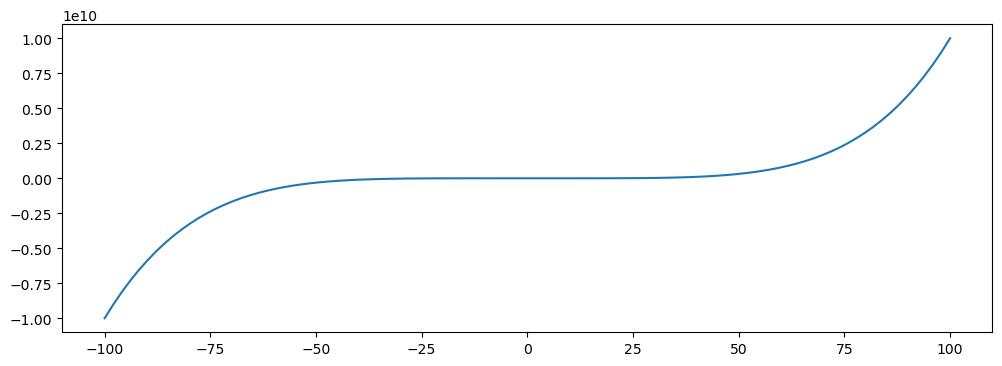

In [15]:
x = np.linspace(-100, 100,100)
y = x ** 5

corr, _ = pearsonr(x, y)
print(f'correlação entre x e x 5: {corr:.3f}')

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(ax=ax, x=x, y=y)

plt.show()

## Correlação de Spearman

O Coeficiente de Correlação por Postos de Spearman, é uma medida não paramétrica da dependência dos postos das variáveis.

Este coeficiente também pode ser chamado de ρ (rho) de Spearman, rs de Spearman ou Correlação de Spearman. Como o nome já dá a entender, a correlação de Spearman descreve a relação entre as variáveis através de uma função monotética.

Isso significa, de maneira simplificada, que ele está analisando se, quando o valor de uma variável aumenta ou diminui, o valor da outra variável aumenta ou diminui.

correlação de Pearson entre x e x 5: 0.821
correlação de Spearman entre x e x 5: 1.000


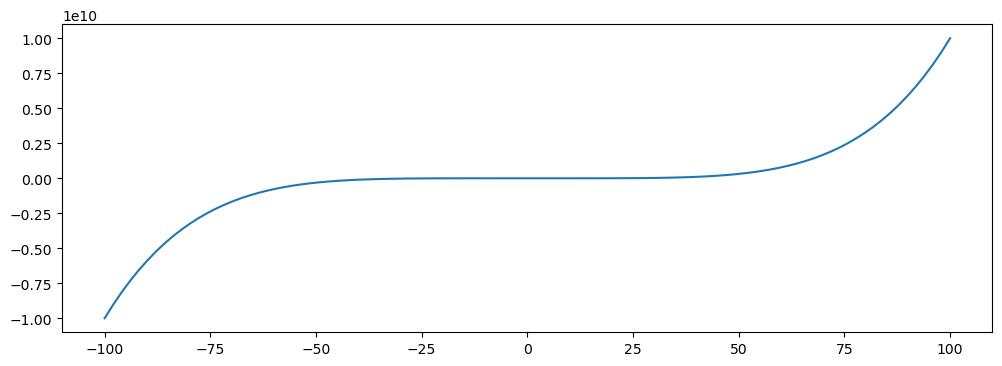

In [17]:
x = np.linspace(-100, 100,100)
y = x ** 5

corr_pearson, _ = pearsonr(x, y)
print(f'correlação de Pearson entre x e x 5: {corr_pearson:.3f}')

corr_spearman, _ = spearmanr(x, y)
print(f'correlação de Spearman entre x e x 5: {corr_spearman:.3f}')

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(ax=ax, x=x, y=y)

plt.show()

Como podemos ver, a correlação de Spearman não olha para a linearidade dos dados, mas apenas confere se a relação cresce (ou diminui) de forma contínua.

Outra forma de pensar: se o coeficiente de correlação de Spearman entre X e Y for 1, então se ordenarmos os valores X de forma crescente, os valores de Y também ficarão ordenados.

### Escolhendo a correlação no DataFrame

Ao chamarmos `df.corr()`, podemos indicar o tipo de correlação usando um argumento (por padrão, a correlação de Pearson é aplicada).

Vamos ver a aplicação nos dados abaixo. Inicialmente, veremos os dados plotados:

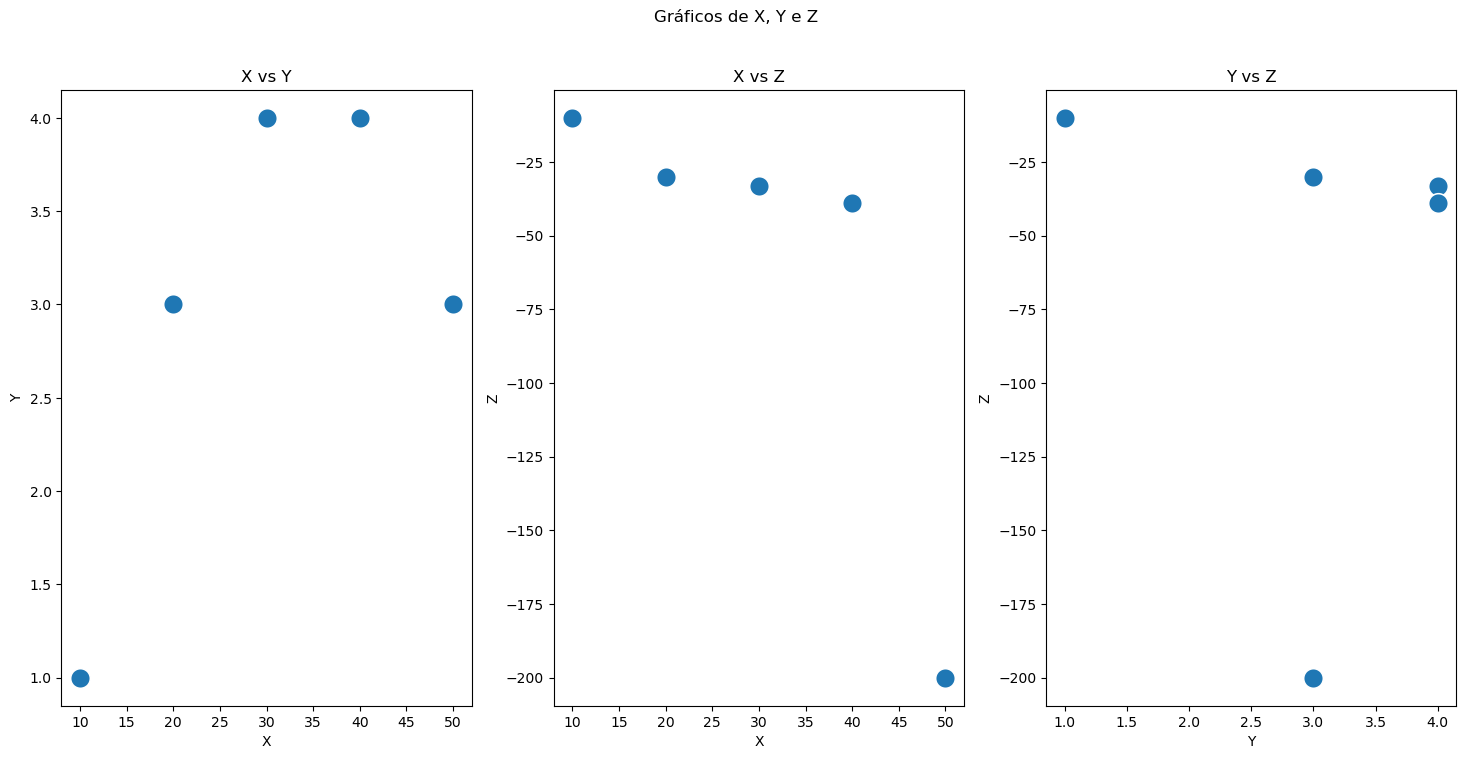

In [19]:
df = pd.DataFrame({
    'X': [10, 20, 30, 40, 50],
    'Y': [1, 3, 4, 4, 3],
    'Z': [-10, -30, -33, -39, -200],
})

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18, 8), ncols=3)

sns.scatterplot(data=df, ax=ax1, x='X', y='Y', s=200)
ax1.set_title('X vs Y')
sns.scatterplot(data=df, ax=ax2, x='X', y='Z', s=200)
ax2.set_title('X vs Z')
sns.scatterplot(data=df, ax=ax3, x='Y', y='Z', s=200)
ax3.set_title('Y vs Z')

fig.suptitle('Gráficos de X, Y e Z')
plt.show()

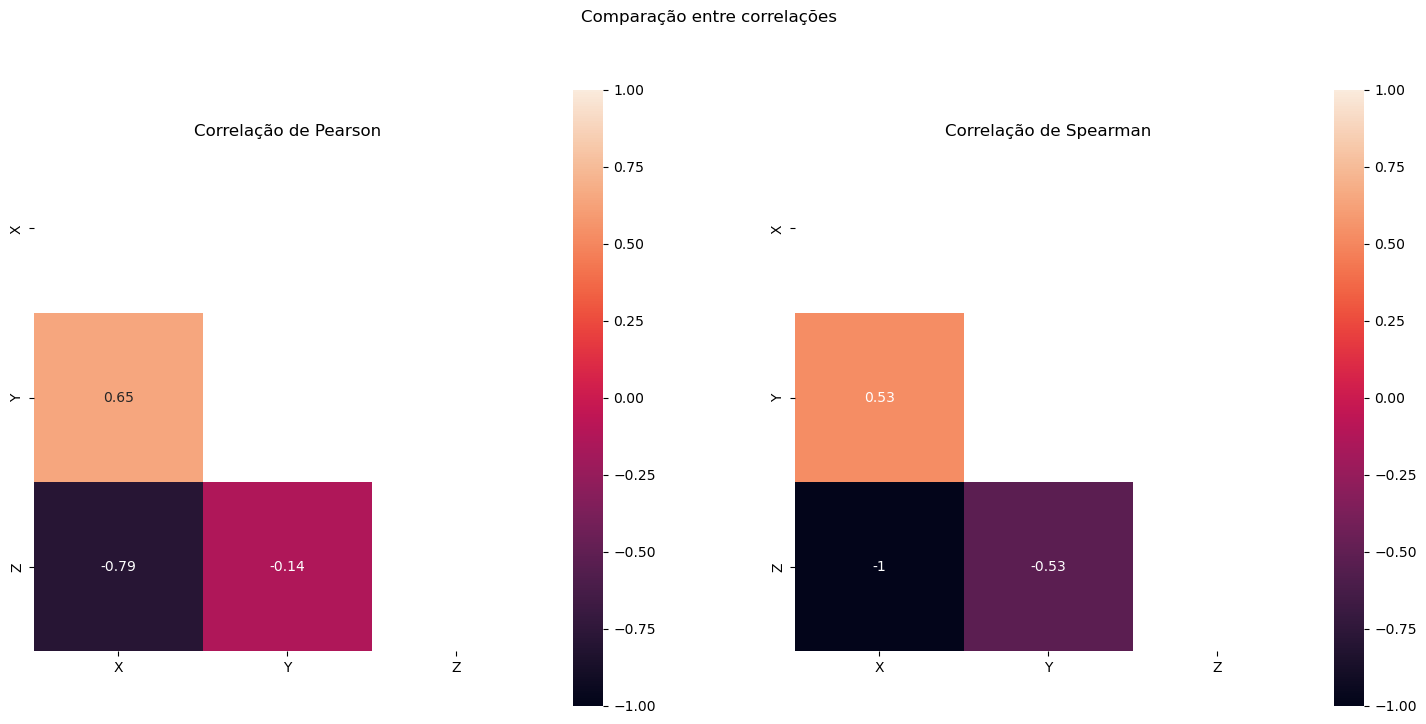

In [20]:
fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)

mask = np.triu(df.corr())

sns.heatmap(data=df.corr('pearson'), ax=ax1, annot=True, cbar=True, square=True, cmap='rocket', vmax=1.0, vmin=-1.0, mask=mask)
ax1.set_title('Correlação de Pearson')
sns.heatmap(data=df.corr('spearman'), ax=ax2, annot=True, cbar=True, square=True, cmap='rocket', vmax=1.0, vmin=-1.0, mask=mask)
ax2.set_title('Correlação de Spearman')

fig.suptitle('Comparação entre correlações')
plt.show()

### Quando usar Pearson ou Spearman?

De certa forma, a correlação de Spearman é uma versão mais "relaxada" da correlação de Pearson.

Em termos estatísticos, a correlação de Spearman é uma versão **não-paramétrica** da correlação de Pearson, uma vez que **não depende dos parâmetros dos dados** (isto é, dos valores de cada elemento individual).

Em resumo:
- Se fizer sentido relacionar as variáveis de forma proporcional ("a cada X unidades de altura, aumento Y unidades de peso"), então use a correlação de Pearson.
- Se só quiser saber quem ficou na frente de quem, em um formato de ranking ("os nadadores mais rápidos são também os corredores mais rápidos"), então use a correlação de Spearman.